# Analyzing insurance dataset and predicting charges using Regression techniques

In [22]:
# Importing necessary ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploring the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
df.shape

(1338, 7)

In [27]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
# checking for duplicates
duplicate_rows = df.duplicated()


print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


In [29]:
cross_tab = pd.crosstab(df['smoker'], df['sex'])
cross_tab

sex,female,male
smoker,,
no,547,517
yes,115,159


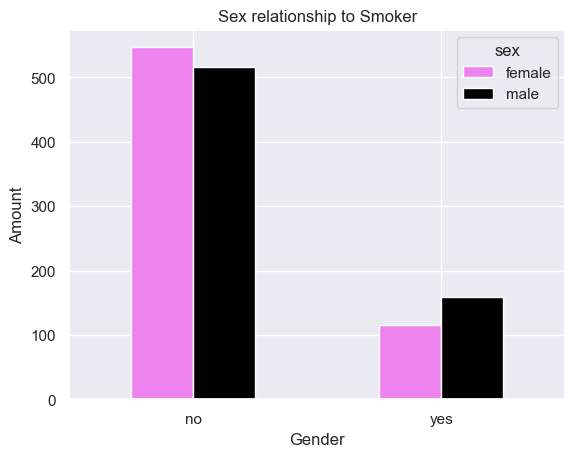

In [30]:
cross_tab.plot(kind="bar", color=["violet","black"]);
plt.title("Sex relationship to Smoker")
plt.xlabel("Gender")
plt.ylabel("Amount")

plt.xticks(rotation=0);
plt.show()

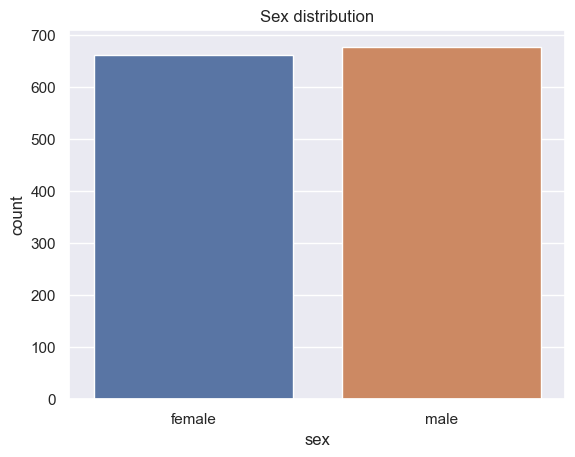

In [31]:
sns.countplot(data=df, x='sex')
plt.title("Sex distribution");

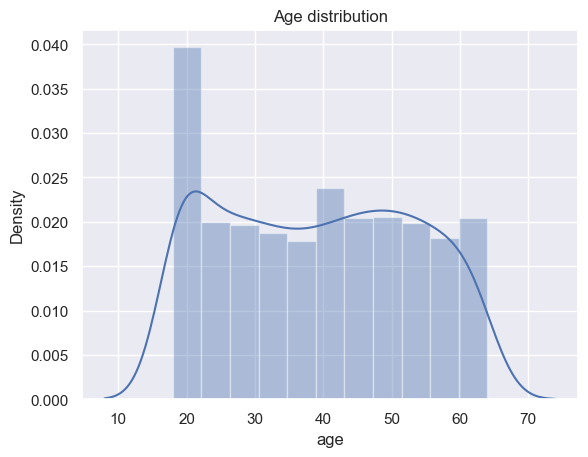

In [32]:
sns.set()
sns.distplot(df['age'])
plt.title("Age distribution");

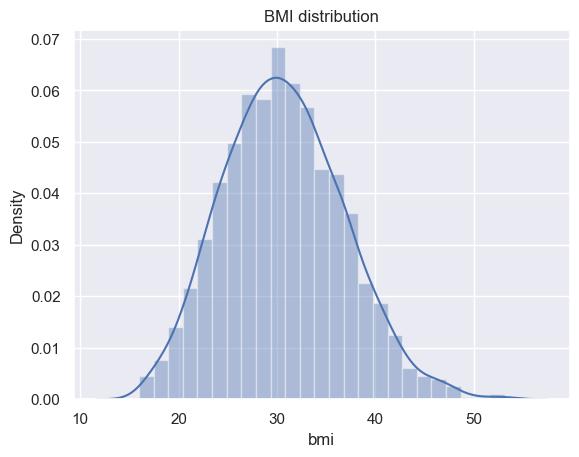

In [33]:
sns.set()
sns.distplot(df['bmi'])
plt.title("BMI distribution");

Normal BMI Range = 18.5—24.9 (Very Healthy)
The data shows that most of the people are overweight having high value of BMI which inturn will have a significant effect on the insurance cost moving it to higher side

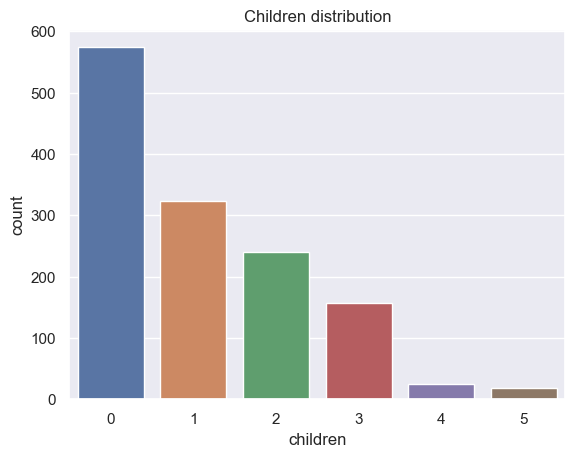

In [34]:
sns.countplot(data=df, x='children')
plt.title("Children distribution");

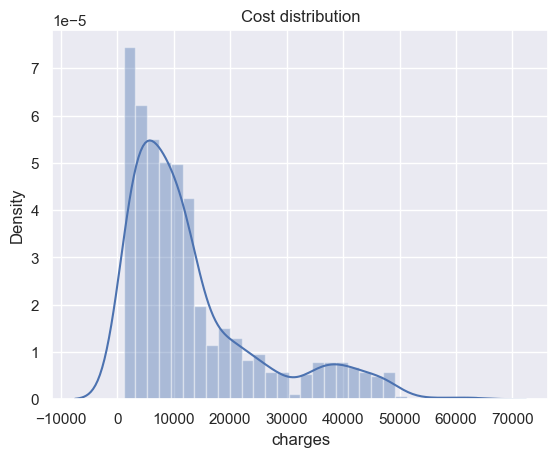

In [35]:
sns.set()
sns.distplot(df['charges'])
plt.title("Cost distribution");

In [36]:
df = df.join(pd.get_dummies(df.sex))
df = df.join(pd.get_dummies(df.smoker))
df = df.join(pd.get_dummies(df.region))
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [37]:
df.drop(['sex'], axis=1)



,age,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [45]:
df = df.drop('sex', axis=1)
df=df.drop('region',axis=1)
df = df.drop('smoker', axis=1)
df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Model Development and Prediction 

In [47]:
from  sklearn.model_selection import train_test_split
X = df.drop(['charges'], axis=1)
y=df['charges']

In [48]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [56]:
reg.score(X_test,y_test)

0.7876508991217354

In [57]:
from sklearn import metrics
train_predict = reg.predict(X_train)

In [59]:
r2_train = metrics.r2_score(y_train, train_predict)
print(r2_train)

0.7409749678393813


In [60]:
test_predict = reg.predict(X_test)

In [61]:
r2_test = metrics.r2_score(y_test, test_predict)
print(r2_test)

0.7876508991217354


In [53]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train,y_train)

RandomForestRegressor()

In [54]:
random.score(X_test,y_test)

0.8703984460184299

In [69]:
input_data = (32,28.880,0,0,1,1,0,0,1,0,0)
input_data_n = np.asarray(input_data)
input_data_reshaped = input_data_n.reshape(1,-1)
prediction = random.predict(input_data_reshaped)
print(prediction)

[4050.7983571]


**Conclusion**
The project involves analyzing the insurance dataset taken from kaggle.com. The dataset is fairly cleaned as it does not consists of any missing or duplicated values. The Exploratory Data Analysis (EDA) is performed on the dataset and useful insights are drawn. The data consists of overweight people having high values of BMI then normal or healthy person. The insurance price is predicted using the regression techniques. The techniques used include linear regression and random forest regressor. The random forest regressor gives a good score as compared to linear regression. The r2 values for linear regression are also calculated for the training and testing data. At the end, the value of charges is predicted using the random forest regressor model showing good results. 